In [1]:
# Empire AI Automation Setup
# Version: 0.1
#
# Copy and paste this as 1st cell into Your workbook to start making automation notebook
# Use the #Factory# page to create new steps
# More videos and tutorials @link
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)

try:
    test = time.time()
except:
    import pyperclip
    import platform
    import time
    import pyautogui as gui
    import io
    import cv2
    import numpy as np
    import codecs
    import dill
    import pandas as pd
    import pyarrow.feather as feather
    from ipywidgets import widgets, Image, Output

class step:
    """
    Empire AI step protocol 0.1
    Inputs step('''xxx''', tries=3, timer=1, gate=1, bbox=None)
    Output step.locations (tuples of x,y in screen space)
    
    """
    def __init__(self, payload, tries=3, timer=1, gate=1, bbox=None, kill_on_fail=True):
        self.payloads = dill.loads(codecs.decode(payload.encode(), "base64"))
        self.pattern_img = self.payloads[0]
        self.offset = self.payloads[1]
        self.kill_on_fail = kill_on_fail
        self.version = 0.1
        
        # Try to find the pattern
        for counter in range(tries):
            self._find_()
            # If enough instances have been found break out of the loop and execute next cell
            if len(self.locations) >= gate:
                print("found: "+str(self.locations))
                break
            else:
                time.sleep(timer)
        
        # If the pattern is not found within timeout
        if len(self.locations) < gate:
            pr.style={'bar_color': '#800000'}
            pl.value="[STOPPED] could not find"
            print("EXCEPTION: Gate condition not met!")
            if kill_on_fail:
                pr.style={'bar_color': '#808000'}
                raise Exception("Gate condition not met!")
        
    def _find_(self):
        """
        Find pattern on the screen as many instances as possible
        save all found locations into self.locations with correct click offset
        """
        
        self.locations = []
        locations_found = gui.locateAllOnScreen(self.pattern_img)
        offset = self.payloads[1]
        
        for loc in locations_found:
            self.locations.append((loc.left+offset[0],loc.top+offset[1]))
            
def os_ctrl(short=False):
    """
    Control buton string replacement to be used with pyautogui lib
    in win/linux it is ctrl and osx cmd/command
    """
    if platform.system() == 'Darwin':
        if short:
            return 'cmd'
        else:
            return 'command'
    else:
        return 'ctrl'
    
# Initalize progress bar and show it the notebook is ran standalone
try:
    pr.value = 0
    pr.style={'bar_color': None}
    #pl.value = ""
except:
    pr = widgets.IntProgress(min=0,max=100,layout=widgets.Layout(width='90%'), description="progress: ")
    pl = widgets.Label(description="debug")
    pr.value = 0 
# right click, create new view for output to have this as progress overview
widgets.VBox([pr,pl])

Next Post

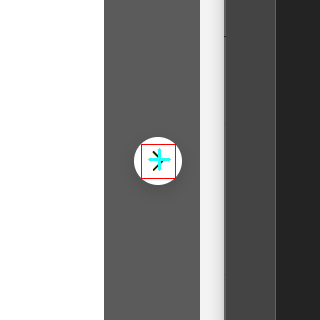

In [2]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVyA0AAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLIksihpROQowNAAD///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v78AAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAAC/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////f398AAAAAAACfn5/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////f398gICCfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLE0sQhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1991, 1122)]


make sure that I have not liked the post yet and get like count

if the hart is read then the outline is not found and the script terminated right here

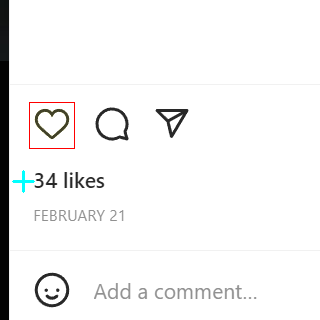